<a href="https://colab.research.google.com/github/yweslakarep123/forex_market_GBPUSD-2021-2024/blob/main/market_watch_2021_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd '/content/drive/MyDrive/Test_dataset'

/content/drive/MyDrive/Test_dataset


In [4]:
import shutil

# Contoh memindahkan file
source_file = '/content/GBPUSD_H1.csv'  # Nama file yang ingin dipindahkan
destination_folder = '/content/drive/MyDrive/Test_dataset'  # Nama folder tujuan
shutil.move(source_file, destination_folder)  # Memindahkan file ke folder tujuan


Error: Destination path '/content/drive/MyDrive/Test_dataset/GBPUSD_H1.csv' already exists

In [5]:
import pandas as pd

# Membaca file TSV
df = pd.read_csv("/content/drive/MyDrive/Test_dataset/GBPUSD_H1.csv", sep='\t')

# Menampilkan isi DataFrame
df.head()


,Time,Open,High,Low,Close,Volume
2008-03-27 15:00:00,2.01105,2.01280,2.00800,2.00955,22379,18
2008-03-27 16:00:00,2.00955,2.00980,2.00570,2.00590,20085,15
2008-03-27 17:00:00,2.00590,2.00750,2.00470,2.00650,21389,19
2008-03-27 18:00:00,2.00650,2.00685,2.00275,2.00350,14408,20
2008-03-27 19:00:00,2.00350,2.00430,2.00240,2.00350,12234,15


In [6]:
df.columns

Index(['Time', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [7]:
df = df.drop(df.columns[5], axis=1)

In [8]:
df.head()

,Time,Open,High,Low,Close
2008-03-27 15:00:00,2.01105,2.01280,2.00800,2.00955,22379
2008-03-27 16:00:00,2.00955,2.00980,2.00570,2.00590,20085
2008-03-27 17:00:00,2.00590,2.00750,2.00470,2.00650,21389
2008-03-27 18:00:00,2.00650,2.00685,2.00275,2.00350,14408
2008-03-27 19:00:00,2.00350,2.00430,2.00240,2.00350,12234


In [9]:
df = df.rename(columns={None: 'Time', 'Time': 'Open', 'Open': 'High', 'High':'Low', 'Low':'Close', 'Close': 'Volume'})

In [10]:
df.head()

,Open,High,Low,Close,Volume
2008-03-27 15:00:00,2.01105,2.01280,2.00800,2.00955,22379
2008-03-27 16:00:00,2.00955,2.00980,2.00570,2.00590,20085
2008-03-27 17:00:00,2.00590,2.00750,2.00470,2.00650,21389
2008-03-27 18:00:00,2.00650,2.00685,2.00275,2.00350,14408
2008-03-27 19:00:00,2.00350,2.00430,2.00240,2.00350,12234


In [11]:
len(df)

100000

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 2008-03-27 15:00:00 to 2024-04-05 10:00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Open    100000 non-null  float64
 1   High    100000 non-null  float64
 2   Low     100000 non-null  float64
 3   Close   100000 non-null  float64
 4   Volume  100000 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 4.6+ MB


In [13]:
df.head()

,Open,High,Low,Close,Volume
2008-03-27 15:00:00,2.01105,2.01280,2.00800,2.00955,22379
2008-03-27 16:00:00,2.00955,2.00980,2.00570,2.00590,20085
2008-03-27 17:00:00,2.00590,2.00750,2.00470,2.00650,21389
2008-03-27 18:00:00,2.00650,2.00685,2.00275,2.00350,14408
2008-03-27 19:00:00,2.00350,2.00430,2.00240,2.00350,12234


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 2008-03-27 15:00:00 to 2024-04-05 10:00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Open    100000 non-null  float64
 1   High    100000 non-null  float64
 2   Low     100000 non-null  float64
 3   Close   100000 non-null  float64
 4   Volume  100000 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 4.6+ MB


In [15]:
df['price'] = ((df['Close']+df['High']+df['Low'])/3)

In [16]:
df.head()

,Open,High,Low,Close,Volume,price
2008-03-27 15:00:00,2.01105,2.01280,2.00800,2.00955,22379,2.010117
2008-03-27 16:00:00,2.00955,2.00980,2.00570,2.00590,20085,2.007133
2008-03-27 17:00:00,2.00590,2.00750,2.00470,2.00650,21389,2.006233
2008-03-27 18:00:00,2.00650,2.00685,2.00275,2.00350,14408,2.004367
2008-03-27 19:00:00,2.00350,2.00430,2.00240,2.00350,12234,2.003400


In [17]:
df['Cumulative_Price_Volume'] = (df['price'] * df['Volume']).cumsum()

In [18]:
df.head()

,Open,High,Low,Close,Volume,price,Cumulative_Price_Volume
2008-03-27 15:00:00,2.01105,2.01280,2.00800,2.00955,22379,2.010117,44984.400883
2008-03-27 16:00:00,2.00955,2.00980,2.00570,2.00590,20085,2.007133,85297.673883
2008-03-27 17:00:00,2.00590,2.00750,2.00470,2.00650,21389,2.006233,128208.998650
2008-03-27 18:00:00,2.00650,2.00685,2.00275,2.00350,14408,2.004367,157087.913583
2008-03-27 19:00:00,2.00350,2.00430,2.00240,2.00350,12234,2.003400,181597.509183


In [19]:
df['Cumulative_Volume'] = df['Volume'].cumsum()

In [20]:
df.head()

,Open,High,Low,Close,Volume,price,Cumulative_Price_Volume,Cumulative_Volume
2008-03-27 15:00:00,2.01105,2.01280,2.00800,2.00955,22379,2.010117,44984.400883,22379
2008-03-27 16:00:00,2.00955,2.00980,2.00570,2.00590,20085,2.007133,85297.673883,42464
2008-03-27 17:00:00,2.00590,2.00750,2.00470,2.00650,21389,2.006233,128208.998650,63853
2008-03-27 18:00:00,2.00650,2.00685,2.00275,2.00350,14408,2.004367,157087.913583,78261
2008-03-27 19:00:00,2.00350,2.00430,2.00240,2.00350,12234,2.003400,181597.509183,90495


In [21]:
df['VWAP'] = df['Cumulative_Price_Volume'] / df['Cumulative_Volume']

In [22]:
df.head()

,Open,High,Low,Close,Volume,price,Cumulative_Price_Volume,Cumulative_Volume,VWAP
2008-03-27 15:00:00,2.01105,2.01280,2.00800,2.00955,22379,2.010117,44984.400883,22379,2.010117
2008-03-27 16:00:00,2.00955,2.00980,2.00570,2.00590,20085,2.007133,85297.673883,42464,2.008706
2008-03-27 17:00:00,2.00590,2.00750,2.00470,2.00650,21389,2.006233,128208.998650,63853,2.007877
2008-03-27 18:00:00,2.00650,2.00685,2.00275,2.00350,14408,2.004367,157087.913583,78261,2.007231
2008-03-27 19:00:00,2.00350,2.00430,2.00240,2.00350,12234,2.003400,181597.509183,90495,2.006713


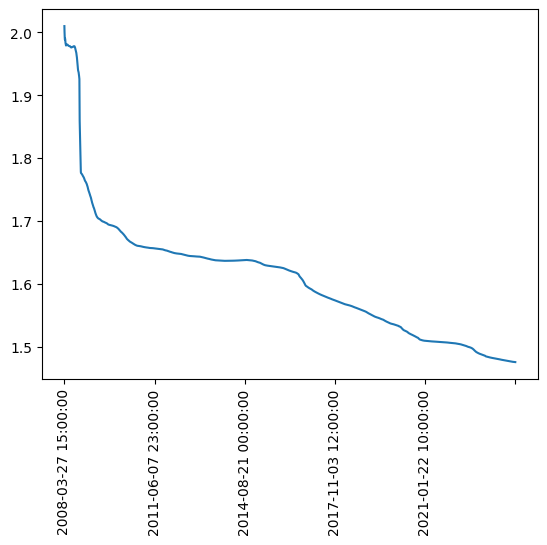

In [31]:
import matplotlib.pyplot as plt
df['VWAP'].plot()
plt.xticks(rotation=90)
plt.show()

In [32]:
len(df)

100000

In [33]:
df_sliced = df.iloc[79653:]

In [34]:
df_sliced.head()

,Open,High,Low,Close,Volume,price,Cumulative_Price_Volume,Cumulative_Volume,VWAP
2021-01-03 23:00:00,1.36589,1.36831,1.36560,1.36803,4583,1.367313,1.100897e+09,729183987,1.509765
2021-01-04 00:00:00,1.36809,1.36832,1.36592,1.36727,10863,1.367170,1.100912e+09,729194850,1.509763
2021-01-04 01:00:00,1.36727,1.36896,1.36706,1.36822,5909,1.368080,1.100920e+09,729200759,1.509762
2021-01-04 02:00:00,1.36820,1.36946,1.36806,1.36922,5529,1.368913,1.100927e+09,729206288,1.509761
2021-01-04 03:00:00,1.36924,1.36961,1.36895,1.36954,3417,1.369367,1.100932e+09,729209705,1.509760


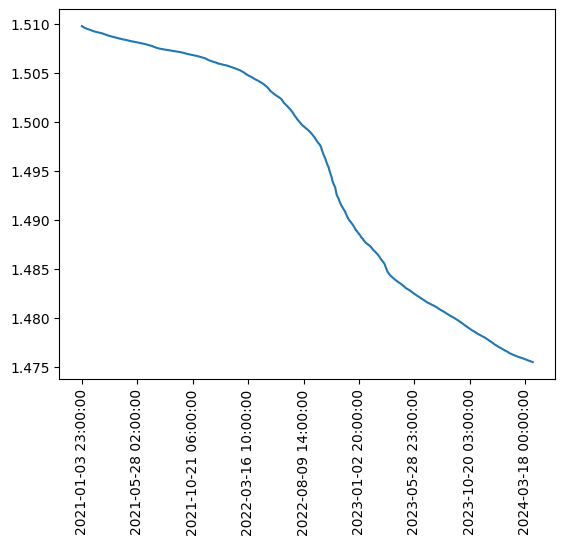

In [35]:
df_sliced['VWAP'].plot()
plt.xticks(rotation=90)
plt.show()

In [36]:
df_sliced.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'price',
       'Cumulative_Price_Volume', 'Cumulative_Volume', 'VWAP'],
      dtype='object')

In [47]:
# Set Target Variable
output_var = pd.DataFrame(df_sliced['VWAP'])
#Selecting the Features
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'price', 'Cumulative_Price_Volume', 'Cumulative_Volume']

In [48]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df_sliced[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df_sliced.index)
feature_transform.head()

,Open,High,Low,Close,Volume,price,Cumulative_Price_Volume,Cumulative_Volume
2021-01-03 23:00:00,0.848441,0.846229,0.852204,0.854045,0.039505,0.848883,0.000000,0.000000
2021-01-04 00:00:00,0.854168,0.846256,0.853022,0.852066,0.093912,0.848501,0.000104,0.000096
2021-01-04 01:00:00,0.852033,0.847995,0.855940,0.854539,0.050993,0.850928,0.000161,0.000148
2021-01-04 02:00:00,0.854454,0.849353,0.858499,0.857143,0.047701,0.853151,0.000214,0.000197
2021-01-04 03:00:00,0.857161,0.849761,0.860777,0.857976,0.029404,0.854360,0.000247,0.000227


In [49]:
from sklearn.model_selection import TimeSeriesSplit
# Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=10) # 90-10%
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [50]:
print(X_train.shape)
print(X_test.shape)

(18498, 8)
(1849, 8)


In [51]:
import numpy as np
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])
print(X_train.shape)
print(X_test.shape)

(18498, 1, 8)
(1849, 1, 8)


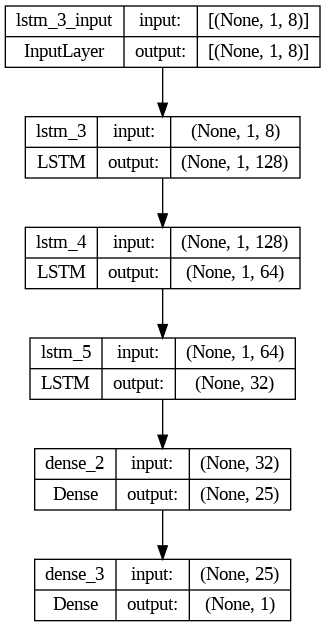

In [52]:
import tensorflow as tf
lstm = tf.keras.Sequential()
lstm.add(tf.keras.layers.LSTM(128, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=True))
lstm.add(tf.keras.layers.LSTM(64, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=True))
lstm.add(tf.keras.layers.LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(tf.keras.layers.Dense(25))
lstm.add(tf.keras.layers.Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
tf.keras.utils.plot_model(lstm, show_shapes=True, show_layer_names=True)

In [53]:
history=lstm.fit(X_train, y_train, epochs=10, batch_size=16, verbose=1, shuffle=False)

Epoch 1/10
1157/1157 [==============================] - 10s 5ms/step - loss: 0.0685
Epoch 2/10
1157/1157 [==============================] - 12s 10ms/step - loss: 0.0015
Epoch 3/10
1157/1157 [==============================] - 8s 7ms/step - loss: 6.8704e-04
Epoch 4/10
1157/1157 [==============================] - 6s 5ms/step - loss: 3.4843e-04
Epoch 5/10
1157/1157 [==============================] - 6s 6ms/step - loss: 1.9878e-04
Epoch 6/10
1157/1157 [==============================] - 7s 6ms/step - loss: 1.2514e-04
Epoch 7/10
1157/1157 [==============================] - 6s 5ms/step - loss: 6.9170e-05
Epoch 8/10
1157/1157 [==============================] - 7s 6ms/step - loss: 4.0940e-05
Epoch 9/10
1157/1157 [==============================] - 6s 5ms/step - loss: 2.5179e-05
Epoch 10/10
1157/1157 [==============================] - 7s 6ms/step - loss: 1.8793e-05


In [54]:
y_pred= lstm.predict(X_test)

58/58 [==============================] - 1s 2ms/step


In [55]:
from sklearn.metrics import mean_squared_error

# Make predictions using the trained model
predictions = lstm.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

58/58 [==============================] - 0s 3ms/step
Mean Squared Error: 8.674478939285575e-06


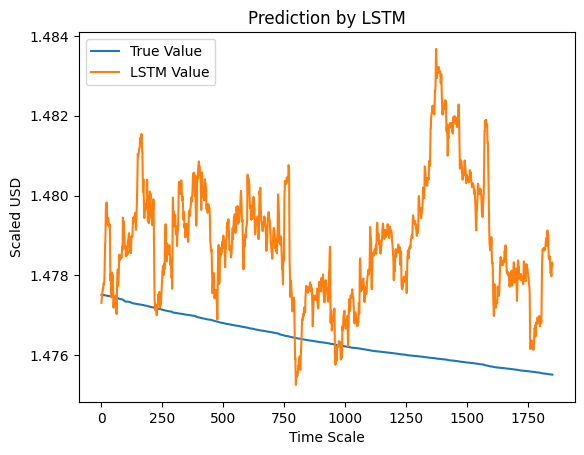

In [56]:
import matplotlib.pyplot as plt
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title('Prediction by LSTM')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()